# Homework 2: DataFrames, Data Visualization, and Functions

## Due Tuesday, April 23rd at 11:59PM

Welcome to Homework 2! This week, we will cover DataFrame manipulations, making visualizations, and defining functions. You can find additional help on these topics in  [BPD 6, 9-12](https://notes.dsc10.com/01-getting_started/functions-defining.html) in the `babypandas` notes and [CIT 7-7.3](https://inferentialthinking.com/chapters/07/Visualization.html) in the textbook.

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

**Please do not use for-loops for any questions in this homework.** If you don't know what a for-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

<font color=red>**🚨 If you create a data visualization that is too cluttered to read or takes more than a few seconds to generate, this is a sign you are doing something wrong. Do not submit code like this, or the Gradescope autograder may fail to grade your entire assignment. It's better to leave a question blank than to submit code that will cause the autograder to fail on your full assignment.**</font>

In [126]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import otter
grader = otter.Notebook()

## 1. Gotta Catch 'Em All! ✅

<center><img src="./images/pokemon.png" width=400/></center>

Pokémon is an immensely popular video game and animation franchise that originated in Japan in 1996. Pokémon, short for Pocket Monsters, come in a variety of types.  In this problem, we will investigate how attack and defense statistics vary among these types

The file named `pokedex.csv` in the `data/` directory has a row for each Pokémon (up to the seventh generation), and the following columns.

|Column|Description|
|------|-----------|
|pokedex_number|The Pokémon's identification number in an encyclopedia of all Pokémon.|
|name|The name of the Pokémon.|
|type|The categorical type of the Pokémon, for example, "normal", "fire", "water". Each Pokémon is limited to one type for simplicity.|
|attack|The Pokémon's power for physical moves.|
|defense|The Pokémon's ability to prevent damage from attacks.|
|hp| Hit Points. Indicates how much damage a Pokémon can tolerate.|
|sp_attack|Special Attack. The Pokémon's power for special moves.|
|sp_defense|Special Defense. The Pokémon's ability to prevent damage from special attacks.|
|generation|A group of Pokémon that are compatible for Pokémon games.|
|is_legendary|Indicates whether the Pokémon is legendary. Legendary Pokémon are rare and powerful. 1 means legendary, 0 means not.|

First, we read the data in as a DataFrame.

In [127]:
pokedex = bpd.read_csv('data/pokedex.csv')
pokedex

,pokedex_number,name,type,attack,defense,hp,sp_attack,sp_defense,generation,is_legendary
0,460,Abomasnow,grass,132,105,90,132,105,4,0
1,63,Abra,psychic,20,15,25,105,55,1,0
2,359,Absol,dark,150,60,65,115,60,3,0
3,617,Accelgor,bug,70,40,80,100,60,5,0
4,681,Aegislash,steel,150,50,60,150,50,6,0
...,...,...,...,...,...,...,...,...,...,...
796,571,Zoroark,dark,105,60,60,120,60,5,0
797,570,Zorua,dark,65,40,40,80,40,5,0
798,41,Zubat,poison,45,35,40,30,40,1,0
799,634,Zweilous,dark,85,70,72,65,70,5,0


Let's explore particular columns to get to know the data a little better. The `.describe()` method gives us some useful information about a column. Try it out on the `'name'` column.

In [128]:
pokedex.get('name').describe()

count           801
unique          801
top       Abomasnow
freq              1
Name: name, dtype: object

We learn that this column has 801 values, all of which are unique, and as a result the most frequent name appears only once.

If we try this same command on the `'type'` column, we'll see that although there are 801 entries, only 18 of them are unique. There are many Pokémon with the same `'type'`. The most common `'type'` is `'water'`; there are 114 such Pokémon. 

In [129]:
pokedex.get('type').describe()

count       801
unique       18
top       water
freq        114
Name: type, dtype: object

**Question 1.1.** Which would be a better choice of index for this dataset, `'name'` or `'type'`? Set the index of `pokedex` to whichever of these two attributes makes more sense.

In [130]:
pokedex = pokedex.set_index('name')
pokedex

,pokedex_number,type,attack,defense,hp,sp_attack,sp_defense,generation,is_legendary
name,,,,,,,,,
Abomasnow,460,grass,132,105,90,132,105,4,0
Abra,63,psychic,20,15,25,105,55,1,0
Absol,359,dark,150,60,65,115,60,3,0
Accelgor,617,bug,70,40,80,100,60,5,0
Aegislash,681,steel,150,50,60,150,50,6,0
...,...,...,...,...,...,...,...,...,...
Zoroark,571,dark,105,60,60,120,60,5,0
Zorua,570,dark,65,40,40,80,40,5,0
Zubat,41,poison,45,35,40,30,40,1,0


In [131]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Assign `weakest_attack` and `weakest_defense` to the names of the weakest Pokémon in terms of attack and defense respectively.

Similarly, assign `strongest_attack` and `strongest_defense` to the names of the strongest Pokémon in terms of attack and defense respectively.

In the case of a tie, choose any one of the equally weakest or equally strongest Pokémon.

In [132]:
weakest_attack = pokedex.sort_values(by='attack').index[0]
print('Weakest attack:', weakest_attack)

strongest_attack = pokedex.sort_values(by='attack').index[-1]
print('Strongest attack:', strongest_attack)

weakest_defense = pokedex.sort_values(by='defense').index[0]
print('Weakest defense:', weakest_defense)

strongest_defense = pokedex.sort_values(by='defense').index[-1]
print('Strongest defense:', strongest_defense)

Weakest attack: Happiny
Strongest attack: Heracross
Weakest defense: Chansey
Strongest defense: Aggron


In [133]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Typically at the beginning of a game, the Pokémon trainer (the player) has to make a choice between `'water'`, `'grass'`, and `'fire'` Pokémon. Make a DataFrame named `water_grass_fire` containing only Pokémon of these `'type'`s. All columns of `pokedex` should be included.

In [134]:
water_grass_fire = pokedex[(pokedex.get('type') == 'water') | 
                           (pokedex.get('type') == 'grass') | 
                           (pokedex.get('type') == 'fire')]

water_grass_fire

,pokedex_number,type,attack,defense,hp,sp_attack,sp_defense,generation,is_legendary
name,,,,,,,,,
Abomasnow,460,grass,132,105,90,132,105,4,0
Alomomola,594,water,75,80,165,40,45,5,0
Amoonguss,591,grass,85,70,114,85,80,5,0
Araquanid,752,water,70,92,68,50,132,7,0
Arcanine,59,fire,110,80,90,100,80,1,0
...,...,...,...,...,...,...,...,...,...
Whimsicott,547,grass,67,85,60,77,75,5,0
Whiscash,340,water,78,73,110,76,71,3,0
Wingull,278,water,30,30,40,55,30,3,0


In [135]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Create a DataFrame named `legendary_pokemon`, indexed by `'type'` and having one column, called `'num_legendary'`, that contains the number of legendary Pokémon of each `'type'`. Only include `'type'`s with at least one legendary Pokémon of that `'type'`.

***Hint:*** You will need to drop and rename columns. Instead of using `.drop`, you may want to use `.get` with a **list** containing the name of a single column.

In [136]:
legendary_pokemon_df = pokedex[pokedex.get('is_legendary') == 1]
legendary_count = legendary_pokemon_df.groupby('type').size()
legendary_pokemon = bpd.DataFrame().assign(num_legendary=legendary_count)

legendary_pokemon

,num_legendary
type,
bug,3
dark,3
dragon,7
electric,5
fairy,1
...,...
normal,3
psychic,17
rock,4


In [137]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Notice that the `legendary_pokemon` DataFrame has fewer than 18 rows, though the original data had 18 unique `'type'`s; this means that there are certain `'type'`s that don't have any legendary Pokémon. Determine which `'type'`s don't have any legendary Pokémon, and assign `non_legendary` to an array of these `'type'`s. 

In [138]:
all_types = pokedex.get('type').unique()

legendary_types = legendary_pokemon.index.values

non_legendary = np.array([type_ for type_ in all_types if type_ not in legendary_types])

non_legendary

array(['poison', 'fighting'], dtype='<U8')

In [139]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Suppose that as a Pokémon trainer, you want to assemble a strong team of Pokémon of various `'type'`s. Create a DataFrame called `mean_stats`, indexed by `'type'`, that contains the average statistics for Pokémon of each type. `mean_stats` should have five columns: `'attack'`, `'defense'`, `'hp'`, `'sp_attack'`, and `'sp_defense'`.

In [140]:
mean_stats = pokedex.groupby('type').mean()
mean_stats = mean_stats.get(['attack', 'defense', 'hp', 'sp_attack', 'sp_defense'])
mean_stats

,attack,defense,hp,sp_attack,sp_defense
type,,,,,
bug,70.125000,70.847222,56.722222,56.652778,62.513889
dark,87.793103,70.517241,72.551724,74.517241,69.068966
dragon,106.407407,86.259259,79.851852,89.592593,84.555556
electric,70.820513,61.820513,60.512821,87.538462,70.051282
fairy,62.111111,68.166667,73.944444,81.500000,87.777778
...,...,...,...,...,...
poison,72.656250,70.031250,65.593750,61.562500,65.531250
psychic,65.566038,69.264151,72.943396,92.603774,85.735849
rock,90.666667,96.266667,66.333333,63.200000,73.377778


In [141]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** A strong Pokémon is one that has high values for `'attack'`, `'defense'`, `'hp'`, `'sp_attack'`, and `'sp_defense'`. Suppose that you develop a formula to summarize all of these stats into a single number called strength. The strength of a Pokémon is a weighted average of these five stats, where each stat is weighted as follows:

- `attack`: 20%
- `defense`: 20%
- `hp`: 30%
- `sp_attack`: 15%
- `sp_defense`: 15%

Define a function called `calculate_strength` that takes as input the `'pokedex_number'` of a Pokémon and returns its strength, as defined above.

In [142]:
def calculate_strength(number):
    pokemon_stats = pokedex[pokedex.get('pokedex_number') == number]
    
    attack = pokemon_stats.get('attack').get(0)
    defense = pokemon_stats.get('defense').get(0)
    hp = pokemon_stats.get('hp').get(0)
    sp_attack = pokemon_stats.get('sp_attack').get(0)
    sp_defense = pokemon_stats.get('sp_defense').get(0)
    
    weights = {'attack': 0.20, 'defense': 0.20, 'hp': 0.30, 'sp_attack': 0.15, 'sp_defense': 0.15}
    
    strength = (attack * weights['attack']) + (defense * weights['defense']) + (hp * weights['hp']) + \
               (sp_attack * weights['sp_attack']) + (sp_defense * weights['sp_defense'])
    
    return strength

In [143]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8.** Create a DataFrame called `with_strength` that contains all the columns of `pokedex` plus one more called `'strength'`, containing the strength of each Pokémon as defined in the previous question. Order the rows in descending order of `'strength'`.

***Hint:*** Use the `calculate_strength` function you've already written.



In [144]:
with_strength = pokedex.assign(strength=pokedex.get('pokedex_number').apply(calculate_strength))
with_strength = with_strength.sort_values(by='strength', ascending=False)
with_strength

,pokedex_number,type,attack,defense,hp,sp_attack,sp_defense,generation,is_legendary,strength
name,,,,,,,,,,
Zygarde,718,dragon,100,121,216,91,95,6,1,136.90
Groudon,383,ground,180,160,100,150,90,3,1,134.00
Rayquaza,384,dragon,180,100,105,180,100,3,1,129.50
Kyogre,382,water,150,90,100,180,160,3,1,129.00
Tyranitar,248,rock,164,150,100,95,120,2,0,125.05
...,...,...,...,...,...,...,...,...,...,...
Wimpod,767,bug,35,40,25,20,30,7,0,30.00
Sunkern,191,grass,30,30,30,30,30,2,0,30.00
Pichu,172,electric,40,15,20,35,35,2,0,27.50


In [145]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Make a plot that will help you answer the question, "*Among water Pokémon, do those with stronger attack power also have stronger defense power?*" Consider only regular `'attack'` and `'defense'`, **not** special (`'sp_attack'`, and `'sp_defense'`).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->

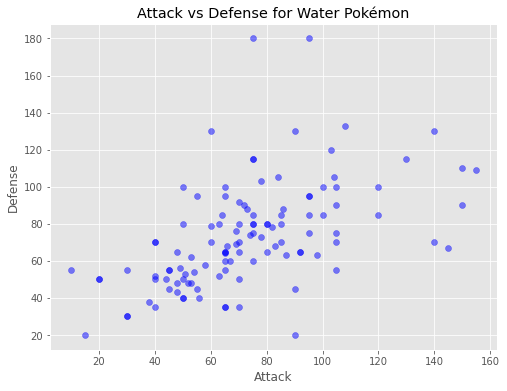

In [146]:
water_pokemon = pokedex[pokedex.get('type') == 'water']

plt.figure(figsize=(8, 6))
plt.scatter(water_pokemon.get('attack'), water_pokemon.get('defense'), color='blue', alpha=0.5)
plt.title("Attack vs Defense for Water Pokémon")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.grid(True)
plt.show()

<!-- END QUESTION -->



**Question 1.10.** Considering that Pokémon `generation`s were developed in order, we might wonder how Pokémon have evolved over time. Draw a line plot that shows the trend, across generations, of the proportion of legendary Pokémon in each generation. This kind of plot might help you answer the question "*Are later-generation Pokémon more likely to be legendary?*"

***Hint:*** You'll have to do some DataFrame manipulation before you can create the line plot.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->

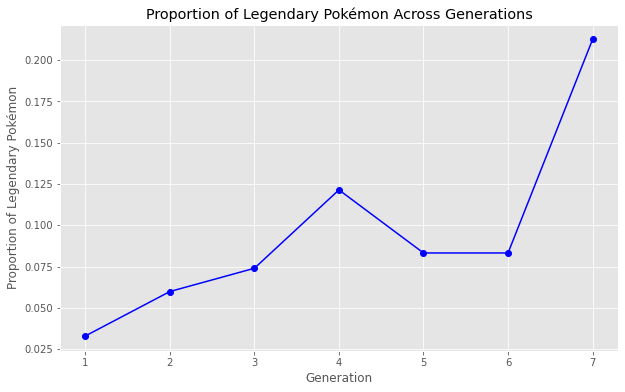

In [147]:
legendary_proportion = pokedex.groupby('generation').mean().get('is_legendary')

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(legendary_proportion.index, legendary_proportion.values, marker='o', color='b', linestyle='-')
plt.title("Proportion of Legendary Pokémon Across Generations")
plt.xlabel("Generation")
plt.ylabel("Proportion of Legendary Pokémon")
plt.xticks(legendary_proportion.index)
plt.grid(True)
plt.show()

<!-- END QUESTION -->



## 2. As Seen on TV 📺

In this problem, we'll work with a dataset from [Kaggle](https://www.kaggle.com/datasets/devanshiipatel/imdb-tv-shows/)  containing information about different TV shows, originally obtained from the Internet Movie Database (IMDb). In the cell below, we load the dataset in as a DataFrame named `tv_shows`. Take some time to look at the data in `tv_shows` to see what information is recorded.

In [148]:
# Run this cell to load the dataset.
tv_shows = bpd.read_csv('data/tv_shows.csv')
tv_shows

,Title,About,Genres,Actors,Rating,Votes,Years
0,The Family Man,A working man from the National Investigation ...,"Action, Comedy, Drama","Manoj Bajpayee, Samantha Akkineni, Priyamani, ...",8.8,57632,2019–
1,Lucifer,Lucifer Morningstar has decided he's had enoug...,"Crime, Drama, Fantasy","Tom Ellis, Lauren German, Lesley-Ann Brandt, K...",8.1,252826,2016–
2,The Handmaid's Tale,"Set in a dystopian future, a woman is forced t...","Drama, Sci-Fi, Thriller","Elisabeth Moss, Yvonne Strahovski, Joseph Fien...",8.4,187007,2017–
3,StartUp,"A desperate banker, a Haitian-American gang lo...","Crime, Thriller","Adam Brody, Edi Gathegi, Otmara Marrero, Krist...",8.0,18165,2016–2018
4,Game of Thrones,Nine noble families fight for control over the...,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019
...,...,...,...,...,...,...,...
2826,A Drop of True Blood,A kids' show centered around a special agent-i...,"Short, Drama, Fantasy","Claudia Abrego, Ryan Kwanten, Stephen Moyer, A...",8.1,572,2010–
2827,Yu-Gi-Oh! GX,An anthology series in which each episode is a...,"Animation, Action, Adventure","Matthew Labyorteaux, Wayne Grayson, Tony Saler...",6.8,4115,2004–2008
2828,Special Agent Oso,Four teenage heroes-for-hire warp through the ...,"Animation, Action, Adventure","Meghan Strange, Gary Anthony Williams, Sean As...",5.2,475,2009–2012
2829,Metal Hurlant Chronicles,An expose on the U.S. government's secret prog...,"Action, Sci-Fi","Scott Adkins, Karl E. Landler, Dominique Pinon...",5.8,1630,2012–2014


**Question 2.1.** If you look at the `'Years'` column in the DataFrame, you'll notice that most of the year ranges are separated by en dashes (`–`). Note that if a show was still on air at the time of data collection, its value in the `'Years'` column will end with an en dash. For example, in the first row of the DataFrame, the value in the `'Years'` column is `'2019–'`, meaning that the show has been airing since 2019. The presence of en dashes indicates that the `'Years'` column contains strings, not ints, since Python never displays ints separated by en dashes.

Complete the implementation of the function `extract_start_year_as_int`, which takes as input a string `v` representing a year range, like the values listed in the DataFrame above, and outputs the start year of `v` as an int. For example, passing in the string `'2016–2018'` to the function should return the int `2016`.

Then, use your function to add a column called `'StartYear'` to the `tv_shows` DataFrame that contains the start year of each show as an integer. You should directly modify the `tv_shows` DataFrame for this question.


**_Hints:_** 
- En dashes (`–`) are **not** the same as hyphens (`-`)! The easiest way to get an en dash is to **copy it from here**: `–`.
- The string method [`.split()`](https://docs.python.org/3/library/stdtypes.html#str.split) will be helpful.


In [149]:
def extract_start_year_as_int(v):
    return int(v.split('–')[0])  # Splitting by en dash and taking the first part

In [150]:
start_years = tv_shows.get('Years').apply(extract_start_year_as_int)
tv_shows = tv_shows.assign(StartYear=start_years)

# Display the modified DataFrame
tv_shows

,Title,About,Genres,Actors,Rating,Votes,Years,StartYear
0,The Family Man,A working man from the National Investigation ...,"Action, Comedy, Drama","Manoj Bajpayee, Samantha Akkineni, Priyamani, ...",8.8,57632,2019–,2019
1,Lucifer,Lucifer Morningstar has decided he's had enoug...,"Crime, Drama, Fantasy","Tom Ellis, Lauren German, Lesley-Ann Brandt, K...",8.1,252826,2016–,2016
2,The Handmaid's Tale,"Set in a dystopian future, a woman is forced t...","Drama, Sci-Fi, Thriller","Elisabeth Moss, Yvonne Strahovski, Joseph Fien...",8.4,187007,2017–,2017
3,StartUp,"A desperate banker, a Haitian-American gang lo...","Crime, Thriller","Adam Brody, Edi Gathegi, Otmara Marrero, Krist...",8.0,18165,2016–2018,2016
4,Game of Thrones,Nine noble families fight for control over the...,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019,2011
...,...,...,...,...,...,...,...,...
2826,A Drop of True Blood,A kids' show centered around a special agent-i...,"Short, Drama, Fantasy","Claudia Abrego, Ryan Kwanten, Stephen Moyer, A...",8.1,572,2010–,2010
2827,Yu-Gi-Oh! GX,An anthology series in which each episode is a...,"Animation, Action, Adventure","Matthew Labyorteaux, Wayne Grayson, Tony Saler...",6.8,4115,2004–2008,2004
2828,Special Agent Oso,Four teenage heroes-for-hire warp through the ...,"Animation, Action, Adventure","Meghan Strange, Gary Anthony Williams, Sean As...",5.2,475,2009–2012,2009
2829,Metal Hurlant Chronicles,An expose on the U.S. government's secret prog...,"Action, Sci-Fi","Scott Adkins, Karl E. Landler, Dominique Pinon...",5.8,1630,2012–2014,2012


In [151]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** You've been starting to feel that TV shows are just not as good as they used to be.  Create an appropriate plot that shows the relationship between the `'StartYear'` and the `'Rating'` of each show in `tv_shows`.

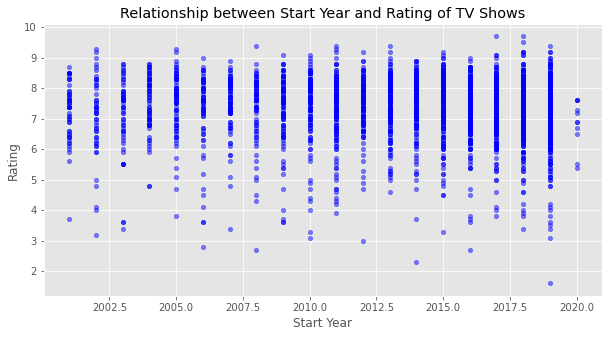

In [152]:
tv_shows_with_start_year.plot(kind='scatter', x='StartYear', y='Rating', color='blue', alpha=0.5)

plt.xlabel('Start Year')
plt.ylabel('Rating')
plt.title('Relationship between Start Year and Rating of TV Shows')

plt.show()

Unfortunately, this plot is not very informative. Instead, make a plot that shows how the **median** `'Rating'` of all shows from a given `'StartYear'` has changed over time. 

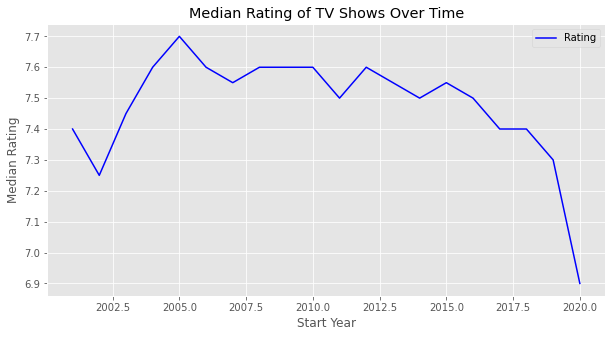

In [153]:
median_ratings = tv_shows_with_start_year.groupby('StartYear').median()

# Create a line plot
median_ratings.plot(kind='line', y='Rating', color='blue')

# Add labels and title
plt.xlabel('Start Year')
plt.ylabel('Median Rating')
plt.title('Median Rating of TV Shows Over Time')

# Display the plot
plt.show()

Now, use the second plot you made to determine whether TV shows are as good as they used to be. Choose the most accurate statement below and assign an integer from 1 to 3 to the variable `q2_2`.

1. TV shows have been getting worse since 2000.
2. TV shows were getting worse until 2005, and since then, they have improved.
3. TV shows have been getting worse since 2005.

In [154]:
q2_2 = 1
q2_2

1

In [155]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Assign `most_common_genres` to a DataFrame that contains the five most common genre combinations of TV shows in our dataset, in descending order of popularity. The DataFrame should be indexed by `'Genres'` and have only one column, `'Count'`, which is the number of TV shows of that genre combination.

**_Note:_**  For this question, each TV show is assicated with one set of genres, which determines its genre combination. For example, `'Action, Adventure, Drama'` is one genre combination. `'Drama'`, by itself, is another genre combination.

In [162]:
most_common_genres = ...
most_common_genres

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
grader.check("q2_3")

**Question 2.4.** Using the `most_common_genres` DataFrame you created in Question 2.3, create a horizontal bar chart that shows the distribution of TV shows into these five genre combinations. Make sure the bars are sorted such that the most common genre appears as the top-most bar in the bar chart.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_4
manual: true
-->

In [ ]:
# Create your bar chart here.
...

<!-- END QUESTION -->



**Question 2.5.** Assign the variable `third_highest` to the genre combination with the third highest average overall `'Rating'` (*not* the third highest frequency), among all genre combinations in `tv_shows`.

Do not manually type out your answer. Use `babypandas` methods to produce the answer.

In [ ]:
third_highest = ...
third_highest

In [ ]:
grader.check("q2_5")

**Question 2.6.** Using the `'StartYear'` column, identify the year between 2001 and 2009 (inclusive) that has the lowest total number of `'Votes'` for TV shows released that year. Assign this year to the variable `lowest_01_09`.

Please make sure to use `babypandas` methods to find your answer; you should not type in the year manually.

<!--
BEGIN QUESTION
name: q2_6
-->

In [ ]:
lowest_01_09 = ...
lowest_01_09

In [ ]:
grader.check("q2_6")

**Question 2.7.** Suppose we'd like to use a histogram to determine which `'Rating'`s are most common in `tv_shows`, to the nearest integer. Set the variable `nearest_integer_bins` to an array of values that can be used for the `bins` argument of this histogram.

Draw the histogram, and then use the histogram to determine the most popular `'Rating'`, to the nearest integer, and manually type this integer in to save it as `most_popular_rating`.

***Notes:*** 
- Use the standard convention for rounding. For example, 9 is considered the nearest integer to 8.5.
- `nearest_integer_bins` should capture all of the data in the `'Rating'` column of `tv_shows` but not include any empty, unused bins. You'll need to determine the smallest and largest `'Rating'` values in `tv_shows` to do this.

In [ ]:
nearest_integer_bins = ...
nearest_integer_bins

In [ ]:
grader.check("q2_7_a")

In [ ]:
# Create your histogram here, using nearest_integer_bins.


In [ ]:
# Now, view the histogram you created and type in an integer for most_popular_rating.
most_popular_rating = ...

In [ ]:
grader.check("q2_7_b")

## 3. Final Stretch 🧘‍♀️

Suppose we have a DataFrame named `data` with two numerical columns, `'x'` and `'y'`. Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

<img src='images/q4_scatter_plot.png' width=400/>

Now consider these two histograms:

<center>
    <table><tr>
        <td><center><b>Histogram A</b><br> <img src='images/q4_histogram_one.png' width=400></center> </td>
        <td><center><b>Histogram B</b><br> <img src='images/q4_histogram_two.png' width=400></center> </td>
    </tr></table>
</center>

**Question 3.1.** Which of the following lines of code generated **Histogram B**? Assign `which_code` to either 1, 2, 3, or 4.
 
 
 1. `data.plot(kind='hist', density=True, y='x')`
 2. `data.plot(kind='hist', density=False, y='x')`
 3. `data.plot(kind='hist', density=True, y='y')`
 4. `data.plot(kind='hist', density=False, y='y')` 

In [ ]:
which_code = 1

In [ ]:
grader.check("q3_1")

**Question 3.2.** Suppose we run this block of code:

```py
new_data = bpd.DataFrame().assign(
    x = data.get('x') / 4,
    y = data.get('y')
)
```
    
We then run 

```py
new_data.plot(kind='hist', density=True, y='x')
```

How will this histogram look compared to the histogram created by 

```py
data.plot(kind='hist', density=True, y='x')
```

assuming both histograms are drawn on the same axes? Assign `histogram_difference` to either 1, 2, 3, or 4, corresponding to your choice.


1. The `new_data` histogram will be narrower and shorter than the `data` histogram.
2. The `new_data` histogram will be wider and shorter than the `data` histogram.
3. The `new_data` histogram will be narrower and taller than the `data` histogram.
4. The `new_data` histogram will be wider and taller than the `data` histogram.



**_Hint:_** Look at the end of [Lecture 7](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-overlaid-histograms) for an example of two histograms drawn on the same axes.

In [ ]:
histogram_difference = 3

In [ ]:
grader.check("q3_2")

**Question 3.3.** Below, we show Histogram A again.

<img src='./images/q4_histogram_one.png' width=400/>

What **percent** of values in Histogram A are between -5 (inclusive) and -3 (exclusive)? While we cannot answer this question exactly since we do not know where the bins start and end, we can still approximate the answer. Assign the variable `percent_between` to a number 1 through 5, corresponding to the closest answer.

1. 22%
1. 27%
1. 34%
1. 40%
1. 48%

In [ ]:
percent_between = 2

In [ ]:
grader.check("q3_3")

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style='color:Maroon;background-color:Maroon;border:0 none; height: 3px;'>

Please cite tools here.

<hr style='color:Maroon;background-color:Maroon;border:0 none; height: 3px;'>

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells. 
1. Read through the notebook to make sure all cells ran and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

With homeworks, unlike with labs, the grade you see on Gradescope is **not your final score**. We will run correctness tests after the assignment's due date has passed.

In [ ]:
grader.check_all()